Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection & Pre-Processing

In [3]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv("D:/Datasets/mail_data.csv")

In [4]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [27]:
# printing the first 5 rows of the dataframe
mail_data.head(10)

,Category,Message
0,Mail,"Go until jurong point, crazy.. Available only ..."
1,Mail,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Mail,U dun say so early hor... U c already then say...
4,Mail,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,Mail,Even my brother is not like to speak with me. ...
7,Mail,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

Label Encoding

In [8]:
 mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 'Mail'

In [9]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [10]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [11]:
print(Y)

0       Mail
1       Mail
2       spam
3       Mail
4       Mail
        ... 
5567    spam
5568    Mail
5569    Mail
5570    Mail
5571    Mail
Name: Category, Length: 5572, dtype: object


Splitting the data into training data & test data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [14]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

#Y_train = Y_train.astype('int')
#Y_test = Y_test.astype('int')

In [15]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [16]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

Testing Mail

In [17]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

Training the Model

Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
model = LogisticRegression()

In [20]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating the trained model

In [21]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
logistic_accuracy = accuracy_score(Y_test, prediction_on_test_data)

In [22]:
print('Accuracy of Logisitic Classifier : ', logistic_accuracy*100)

Accuracy of Logisitic Classifier :  96.68161434977578


In [23]:
print(classification_report(Y_test, prediction_on_test_data))

              precision    recall  f1-score   support

        Mail       0.96      1.00      0.98       960
        spam       1.00      0.76      0.86       155

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [26]:
confusion_matrix(Y_test, prediction_on_test_data)

array([[960,   0],
       [ 37, 118]], dtype=int64)

In [24]:
# making prediction
prediction1 = model.predict(input_data_features)
print(prediction1)

['Mail']


RandomForest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

In [26]:
model = RandomForestClassifier(n_estimators=200,max_depth=60)

In [27]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

RandomForestClassifier(max_depth=60, n_estimators=200)

In [28]:
# prediction on test data

prediction_on_training_data = model.predict(X_test_features)
randomforest_accuracy = accuracy_score(Y_test, prediction_on_training_data)

In [29]:
print('Accuracy of RandomForest Classifier : ', randomforest_accuracy*100)

Accuracy of RandomForest Classifier :  97.21973094170404


In [30]:
print(classification_report(Y_test, prediction_on_test_data))

              precision    recall  f1-score   support

        Mail       0.96      1.00      0.98       960
        spam       1.00      0.76      0.86       155

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [31]:
prediction2 = model.predict(input_data_features)
print(prediction2)

['Mail']


ExraTree Classifier

In [32]:
model = ExtraTreesClassifier(n_estimators=200,max_depth=65)

In [33]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

ExtraTreesClassifier(max_depth=65, n_estimators=200)

In [34]:
# prediction on test data

prediction_on_training_data = model.predict(X_test_features)
extra_tree_accuracy = accuracy_score(Y_test, prediction_on_training_data)

In [35]:
print('Accuracy of ExtraTree Classifier : ', extra_tree_accuracy*100)

Accuracy of ExtraTree Classifier :  96.95067264573991


In [36]:
print(classification_report(Y_test, prediction_on_test_data))

              precision    recall  f1-score   support

        Mail       0.96      1.00      0.98       960
        spam       1.00      0.76      0.86       155

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [37]:
prediction3 = model.predict(input_data_features)
print(prediction3)

['Mail']


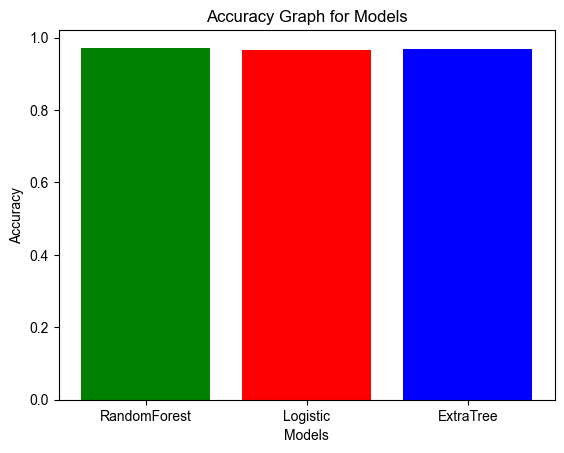

In [38]:
plt.bar(['RandomForest','Logistic','ExtraTree'],[randomforest_accuracy,logistic_accuracy,extra_tree_accuracy],color=['green','red','blue'])
plt.title('Accuracy Graph for Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
sns.set_style('whitegrid')
plt.show()

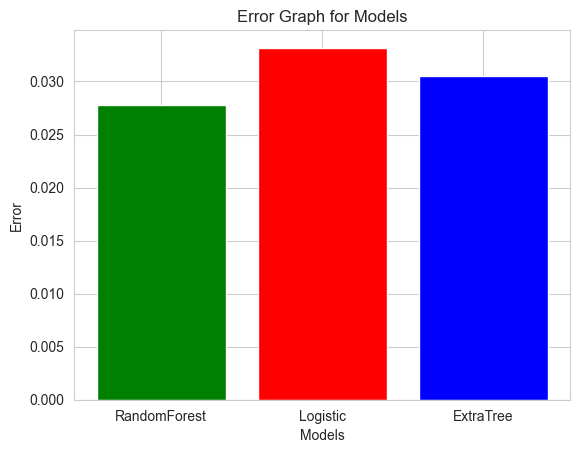

In [39]:
plt.bar(['RandomForest','Logistic','ExtraTree'],[1-randomforest_accuracy,1-logistic_accuracy,1-extra_tree_accuracy],color=['green','red','blue'])
plt.title('Error Graph for Models')
plt.xlabel('Models')
plt.ylabel('Error')
plt.show()

Model Deployment

In [40]:
prediction_table = {'Models':['RandomForest','Logistic','ExtraTree'],'Prediction':[prediction2,prediction1,prediction3]}
prediction_table = pd.DataFrame(prediction_table)
prediction_table

,Models,Prediction
0,RandomForest,[Mail]
1,Logistic,[Mail]
2,ExtraTree,[Mail]
